# Speech Emotion Recognition
**Info on Audio dataset**

*Ravdess*:

Here is the filename identifiers as per the official RAVDESS website:

- Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
- Vocal channel (01 = speech, 02 = song).
- Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
- Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
- Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
- Repetition (01 = 1st repetition, 02 = 2nd repetition).
- Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

So, here's an example of an audio filename. 02-01-06-01-02-01-12.wav This means the meta data for the audio file is:

- Video-only (02)
- Speech (01)
- Fearful (06)
- Normal intensity (01)
- Statement "dogs" (02)
- 1st Repetition (01)
- 12th Actor (12) - Female (as the actor ID number is even)

*Crema*:

The third component is responsible for the emotion part:

- SAD - sadness;
- ANG - angry;
- DIS - disgust;
- FEA - fear;
- HAP - happy;
- NEU - neutral.

*Tess*:

Very similar to Crema - part of emotion is contained in the name of file.

*Savee*:

The audio files in this dataset are named in such a way that the prefix letters describes the emotion classes as follows:

- 'a' = 'anger'
- 'd' = 'disgust'
- 'f' = 'fear'
- 'h' = 'happiness'
- 'n' = 'neutral'
- 'sa' = 'sadness'
- 'su' = 'surprise'

## Import Libraries

In [35]:
import os
import pandas as pd
import numpy as np

#Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Audio processing
import librosa as lr
import librosa.display
import IPython.display as ipd

## Load Dataset

In [36]:
#get the sub_directory names
subaudio_dir=[]
paths=[]
audio_dir="C:\\Users\\markanthony\\RAIN-INN-Speech-Emotion-Recognition\\archive"
for sub in os.listdir(audio_dir):
    subaudio_dir.append(sub)
    paths.append(os.path.join(audio_dir,sub))
os.path.isdir(paths[1])

paths

['C:\\Users\\markanthony\\RAIN-INN-Speech-Emotion-Recognition\\archive\\Crema',
 'C:\\Users\\markanthony\\RAIN-INN-Speech-Emotion-Recognition\\archive\\Ravdess',
 'C:\\Users\\markanthony\\RAIN-INN-Speech-Emotion-Recognition\\archive\\Savee',
 'C:\\Users\\markanthony\\RAIN-INN-Speech-Emotion-Recognition\\archive\\Tess']

In [37]:
#Crema Dataset
crema_dir=paths[0]
crema_dir_list= os.listdir(crema_dir)

c_emotion_dict={'SAD':'sad','ANG':'angry','DIS':'disgust','FEA':'fear','HAP':'happy','NEU':'neutral'}
emotion_list= []
file_path_list= []

for file in crema_dir_list:
    file_path_list.append(os.path.join(crema_dir,file))
    part=file.split('_')[2]

    if part=='SAD':
        emotion_list.append(c_emotion_dict['SAD'])
    elif part=='ANG':
        emotion_list.append(c_emotion_dict['ANG']) 
    elif part=='DIS':
        emotion_list.append(c_emotion_dict['DIS'])
    elif part=='FEA':
        emotion_list.append(c_emotion_dict['FEA'])
    elif part=='HAP':
        emotion_list.append(c_emotion_dict['HAP'])
    elif part=='NEU':
        emotion_list.append(c_emotion_dict['NEU'])   

#confirm the number of data
print(len(emotion_list))
file_count= len([file for file in crema_dir_list if os.path.isfile(os.path.join(crema_dir,file))])
print(file_count)

crema_df = pd.DataFrame(data={'File_path': file_path_list, 'Emotion': emotion_list})
crema_df.sample(10)

7442
7442


,File_path,Emotion
3352,C:\Users\markanthony\RAIN-INN-Speech-Emotion-R...,disgust
5656,C:\Users\markanthony\RAIN-INN-Speech-Emotion-R...,happy
2453,C:\Users\markanthony\RAIN-INN-Speech-Emotion-R...,fear
4496,C:\Users\markanthony\RAIN-INN-Speech-Emotion-R...,sad
3199,C:\Users\markanthony\RAIN-INN-Speech-Emotion-R...,sad
2143,C:\Users\markanthony\RAIN-INN-Speech-Emotion-R...,fear
5890,C:\Users\markanthony\RAIN-INN-Speech-Emotion-R...,sad
5954,C:\Users\markanthony\RAIN-INN-Speech-Emotion-R...,sad
4161,C:\Users\markanthony\RAIN-INN-Speech-Emotion-R...,neutral
4324,C:\Users\markanthony\RAIN-INN-Speech-Emotion-R...,happy


In [38]:
#Ravdess dataset
ravdess_dir=paths[1]
ravdess_sub1dir=os.listdir(ravdess_dir)
ravdess_sub1dir=os.path.join(ravdess_dir,ravdess_sub1dir[0])
ravdess_sub2dir=os.listdir(ravdess_sub1dir)
ravdess_audio_dir=[]
for dir in ravdess_sub2dir:
    ravdess_audio_dir.append(os.path.join(ravdess_sub1dir,dir))

r_emotion_dict={'01' : 'neutral','02' : 'calm', '03' : 'happy', '04' : 'sad', '05' : 'angry', '06' : 'fear', '07' : 'disgust', '08' : 'surprise'}
emotion_list_r=[]
file_path_list_r=[]

ravdess_audio_dir
for dir in ravdess_audio_dir:
    file_list= os.listdir(dir)
    for file in file_list:
        file_path_list_r.append(os.path.join(dir,file))
        sep=file.split('-')[2]

        if sep=='01':
            emotion_list_r.append(r_emotion_dict['01'])
        elif sep=='02':
            emotion_list_r.append(r_emotion_dict['02'])
        elif sep=='03':
            emotion_list_r.append(r_emotion_dict['03'])
        elif sep=='04':
            emotion_list_r.append(r_emotion_dict['04'])
        elif sep=='05':
            emotion_list_r.append(r_emotion_dict['05'])
        elif sep=='06':
            emotion_list_r.append(r_emotion_dict['06'])
        elif sep=='07':
            emotion_list_r.append(r_emotion_dict['07'])
        elif sep=='08':
            emotion_list_r.append(r_emotion_dict['08'])

ravdess_df=pd.DataFrame(data={'File_path':file_path_list_r,'Emotion':emotion_list_r})
ravdess_df.sample(10)

,File_path,Emotion
1134,C:\Users\markanthony\RAIN-INN-Speech-Emotion-R...,surprise
677,C:\Users\markanthony\RAIN-INN-Speech-Emotion-R...,happy
626,C:\Users\markanthony\RAIN-INN-Speech-Emotion-R...,sad
1160,C:\Users\markanthony\RAIN-INN-Speech-Emotion-R...,sad
3,C:\Users\markanthony\RAIN-INN-Speech-Emotion-R...,neutral
92,C:\Users\markanthony\RAIN-INN-Speech-Emotion-R...,angry
557,C:\Users\markanthony\RAIN-INN-Speech-Emotion-R...,happy
823,C:\Users\markanthony\RAIN-INN-Speech-Emotion-R...,fear
772,C:\Users\markanthony\RAIN-INN-Speech-Emotion-R...,surprise
259,C:\Users\markanthony\RAIN-INN-Speech-Emotion-R...,happy


In [39]:
#Savee dataset
savee_dir=paths[2]
savee_dir_list=os.listdir(savee_dir)

s_emotion_dict={'a':'angry','d' : 'disgust','f' : 'fear','h' : 'happy','n' : 'neutral','sa' : 'sad','su' : 'surprise'}
emotion_list_s=[]
file_path_list_s=[]


for file in savee_dir_list:
    file_path_list_s.append(os.path.join(savee_dir,file))
    test=file.split('.')[0]
    tp=test.split('_')[1][:-2]     
    
    if tp=='a':
        emotion_list_s.append(s_emotion_dict['a'])
    elif tp=='d':
        emotion_list_s.append(s_emotion_dict['d'])
    elif tp=='f':
        emotion_list_s.append(s_emotion_dict['f'])
    elif tp=='h':
        emotion_list_s.append(s_emotion_dict['h'])
    elif tp=='n':
        emotion_list_s.append(s_emotion_dict['n'])
    elif tp=='sa':
        emotion_list_s.append(s_emotion_dict['sa'])
    elif tp=='su':
        emotion_list_s.append(s_emotion_dict['su'])

#confirm the number of data
# print(len(emotion_list_s))
# file_count= len([file for file in savee_dir_list if os.path.isfile(os.path.join(savee_dir,file))])
# print(file_count)


savee_df=pd.DataFrame({'File_path':file_path_list_s,'Emotion':emotion_list_s})
savee_df.sample(10)

,File_path,Emotion
314,C:\Users\markanthony\RAIN-INN-Speech-Emotion-R...,neutral
399,C:\Users\markanthony\RAIN-INN-Speech-Emotion-R...,fear
49,C:\Users\markanthony\RAIN-INN-Speech-Emotion-R...,happy
53,C:\Users\markanthony\RAIN-INN-Speech-Emotion-R...,happy
280,C:\Users\markanthony\RAIN-INN-Speech-Emotion-R...,fear
460,C:\Users\markanthony\RAIN-INN-Speech-Emotion-R...,sad
67,C:\Users\markanthony\RAIN-INN-Speech-Emotion-R...,neutral
190,C:\Users\markanthony\RAIN-INN-Speech-Emotion-R...,neutral
192,C:\Users\markanthony\RAIN-INN-Speech-Emotion-R...,neutral
392,C:\Users\markanthony\RAIN-INN-Speech-Emotion-R...,fear


In [40]:
#Tess dataset
tess_dir=paths[3]
tess_sub_dir=os.listdir(tess_dir)
tess_audio_dir=[]
for file in tess_sub_dir:
    tess_audio_dir.append(os.path.join(tess_dir,file))

emotion_list_t=[]
file_path_list_t=[]

for dir in tess_audio_dir:
    fl=os.listdir(dir)
    for file in fl:
        file_path_list_t.append(os.path.join(dir,file))
        sp=file.split('_')[2]
        sep_t=sp.split('.')[0]

        if sep_t=='angry':
            emotion_list_t.append('angry')
        elif sep_t=='disgust':
            emotion_list_t.append('disgust')
        elif sep_t=='fear':
            emotion_list_t.append('fear')
        elif sep_t=='happy':
            emotion_list_t.append('happy')
        elif sep_t=='neutral':
            emotion_list_t.append('neutral')
        elif sep_t=='ps':
            emotion_list_t.append('surprise')
        elif sep_t=='sad':
            emotion_list_t.append('sad')

tess_df=pd.DataFrame(data={'File_path':file_path_list_t,'Emotion':emotion_list_t})
tess_df.sample(10)

,File_path,Emotion
2148,C:\Users\markanthony\RAIN-INN-Speech-Emotion-R...,happy
1732,C:\Users\markanthony\RAIN-INN-Speech-Emotion-R...,disgust
2520,C:\Users\markanthony\RAIN-INN-Speech-Emotion-R...,surprise
852,C:\Users\markanthony\RAIN-INN-Speech-Emotion-R...,neutral
2292,C:\Users\markanthony\RAIN-INN-Speech-Emotion-R...,neutral
1057,C:\Users\markanthony\RAIN-INN-Speech-Emotion-R...,surprise
916,C:\Users\markanthony\RAIN-INN-Speech-Emotion-R...,neutral
67,C:\Users\markanthony\RAIN-INN-Speech-Emotion-R...,angry
1783,C:\Users\markanthony\RAIN-INN-Speech-Emotion-R...,disgust
601,C:\Users\markanthony\RAIN-INN-Speech-Emotion-R...,happy


In [41]:
audio_df=pd.concat([crema_df,ravdess_df,savee_df,tess_df],axis=0)
audio_df.reset_index(drop=True,inplace=True)

In [42]:
audio_df.index

RangeIndex(start=0, stop=12162, step=1)

## EDA

**Check out the head(), info() methods on the data**

In [43]:
audio_df.head(10)

,File_path,Emotion
0,C:\Users\markanthony\RAIN-INN-Speech-Emotion-R...,angry
1,C:\Users\markanthony\RAIN-INN-Speech-Emotion-R...,disgust
2,C:\Users\markanthony\RAIN-INN-Speech-Emotion-R...,fear
3,C:\Users\markanthony\RAIN-INN-Speech-Emotion-R...,happy
4,C:\Users\markanthony\RAIN-INN-Speech-Emotion-R...,neutral
5,C:\Users\markanthony\RAIN-INN-Speech-Emotion-R...,sad
6,C:\Users\markanthony\RAIN-INN-Speech-Emotion-R...,angry
7,C:\Users\markanthony\RAIN-INN-Speech-Emotion-R...,angry
8,C:\Users\markanthony\RAIN-INN-Speech-Emotion-R...,angry
9,C:\Users\markanthony\RAIN-INN-Speech-Emotion-R...,disgust


In [44]:
audio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12162 entries, 0 to 12161
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   File_path  12162 non-null  object
 1   Emotion    12162 non-null  object
dtypes: object(2)
memory usage: 190.2+ KB


In [45]:
#unique emotions
audio_df['Emotion'].unique()

array(['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'calm',
       'surprise'], dtype=object)

In [46]:
print('Distribution of data')
audio_df['Emotion'].value_counts()

Distribution of data


Emotion
angry       1923
disgust     1923
fear        1923
happy       1923
sad         1923
neutral     1703
surprise     652
calm         192
Name: count, dtype: int64

In [47]:
print('Percentage distribution of data:')
audio_df['Emotion'].value_counts().apply(lambda x: x*100/len(audio_df))

Percentage distribution of data:


Emotion
angry       15.811544
disgust     15.811544
fear        15.811544
happy       15.811544
sad         15.811544
neutral     14.002631
surprise     5.360960
calm         1.578688
Name: count, dtype: float64

In [48]:
audio_df['Emotion'].value_counts().index

Index(['angry', 'disgust', 'fear', 'happy', 'sad', 'neutral', 'surprise',
       'calm'],
      dtype='object', name='Emotion')

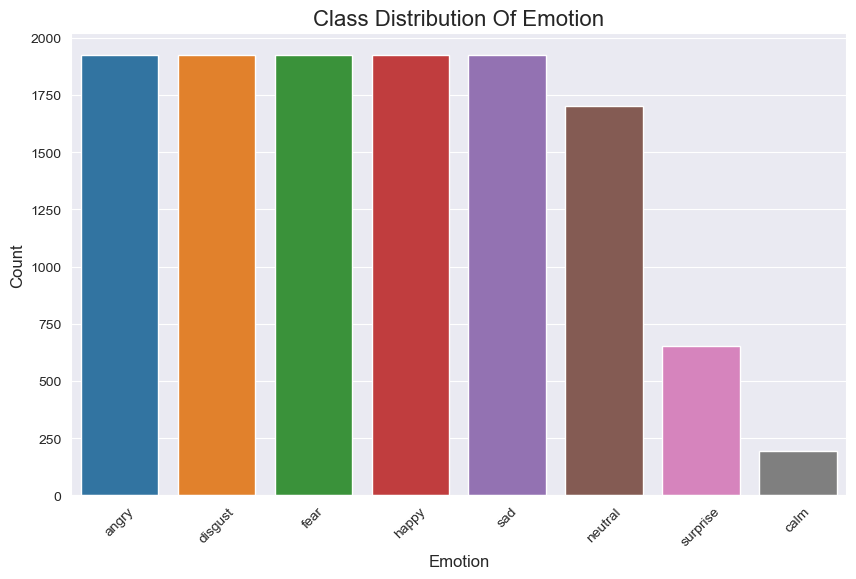

In [49]:
#class distribution
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
sns.countplot(data=audio_df,x='Emotion',order=audio_df['Emotion'].value_counts().index)
plt.title('Class Distribution Of Emotion',size=16)
plt.xlabel('Emotion',size=12)
plt.ylabel('Count',size=12)
plt.xticks(rotation=45);

In [50]:
#sample duration
def get_duration(path):
    try:
        signal,sr=lr.load(path,sr=22050)
        duration=lr.get_duration(y=signal,sr=sr)
        return duration
    except Exception as e:
        print(f'Error loading {path}: {e}')
        return None

audio_df['Duration']=audio_df['File_path'].apply(get_duration)
audio_df.sample(10)

,File_path,Emotion,Duration
12004,C:\Users\markanthony\RAIN-INN-Speech-Emotion-R...,sad,2.426032
3979,C:\Users\markanthony\RAIN-INN-Speech-Emotion-R...,neutral,2.168844
11457,C:\Users\markanthony\RAIN-INN-Speech-Emotion-R...,happy,1.873923
4927,C:\Users\markanthony\RAIN-INN-Speech-Emotion-R...,neutral,1.968662
3305,C:\Users\markanthony\RAIN-INN-Speech-Emotion-R...,neutral,2.502540
1523,C:\Users\markanthony\RAIN-INN-Speech-Emotion-R...,fear,3.069751
400,C:\Users\markanthony\RAIN-INN-Speech-Emotion-R...,happy,2.836190
11313,C:\Users\markanthony\RAIN-INN-Speech-Emotion-R...,fear,1.622630
6749,C:\Users\markanthony\RAIN-INN-Speech-Emotion-R...,sad,3.370023
9967,C:\Users\markanthony\RAIN-INN-Speech-Emotion-R...,happy,2.011655


In [51]:
get_duration(audio_df['File_path'].iloc[0])

2.2756009070294785

In [52]:
audio_df['Duration'].idxmax()
audio_df.iloc[9105]

File_path    C:\Users\markanthony\RAIN-INN-Speech-Emotion-R...
Emotion                                                    sad
Duration                                               7.13873
Name: 9105, dtype: object

c:\Users\markanthony\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Count')

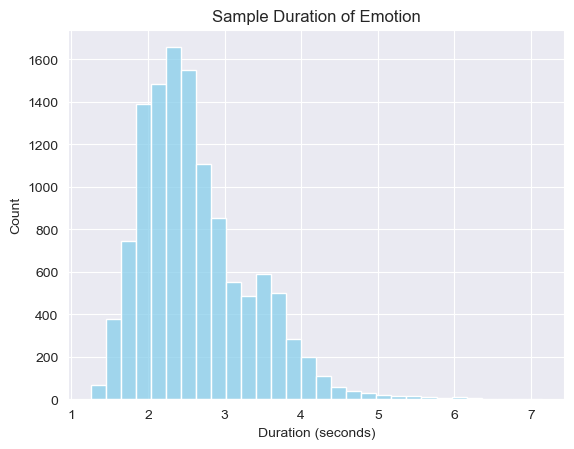

In [53]:
plt.title('Sample Duration of Emotion')
sns.histplot(audio_df['Duration'],bins=30,color='skyblue',kde=False)
plt.xlabel('Duration (seconds)',size=10)
plt.ylabel('Count',size=10)

In [87]:
#Waveform & Spectrogram
sns.set_style('ticks')

#Define Waveplot function
def waveplot(audio_data,samp_rate=22050):
    path=audio_data.iloc[0]
    emotion=audio_data.iloc[1]
    signal,sr=lr.load(path=path,sr=samp_rate)
    plt.figure(figsize=(12,6))
    plt.title(emotion.capitalize() + ' waveform',size=20)
    librosa.display.waveshow(y=signal,sr=sr)

#Define spectrogram function
def spectrogram(audio_data,samp_rate=22050,frame_size=2048,hop_size=512,y_axis='log'):
    path=audio_data.iloc[0]
    emotion=audio_data.iloc[1]
    signal,sr=lr.load(path=path,sr=samp_rate)
    stft=lr.stft(signal,n_fft=frame_size,hop_length=hop_size)
    db=librosa.power_to_db(np.abs(stft**2))
    plt.figure(figsize=(12,6))
    plt.title(emotion.capitalize() + ' Spectrogram',size=20)
    librosa.display.specshow(data=db,sr=samp_rate,hop_length=hop_size,x_axis='time',y_axis=y_axis,cmap='magma')
    plt.colorbar(format='%+2.0f dB')


In [67]:
print('Emotion list:',audio_df['Emotion'].unique())

Emotion list: ['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'calm' 'surprise']


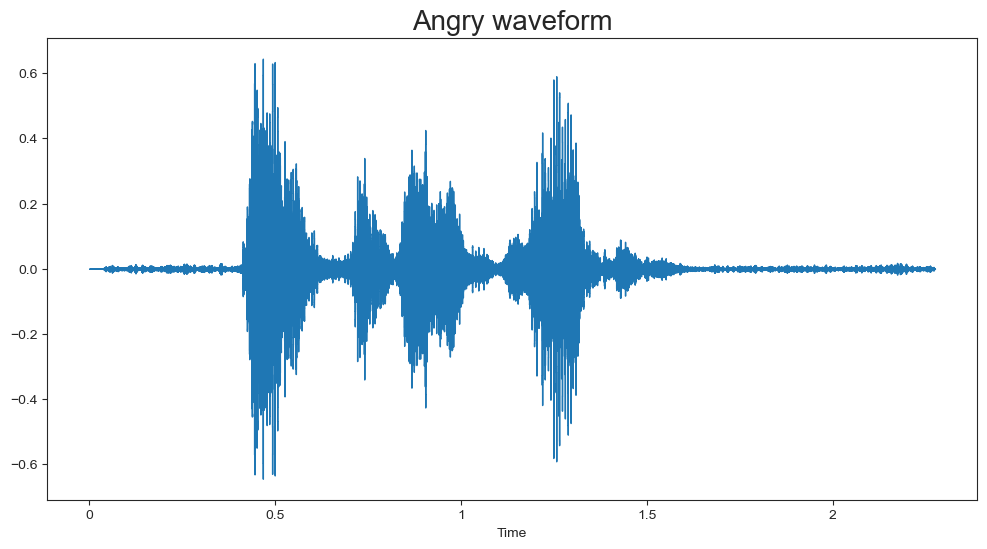

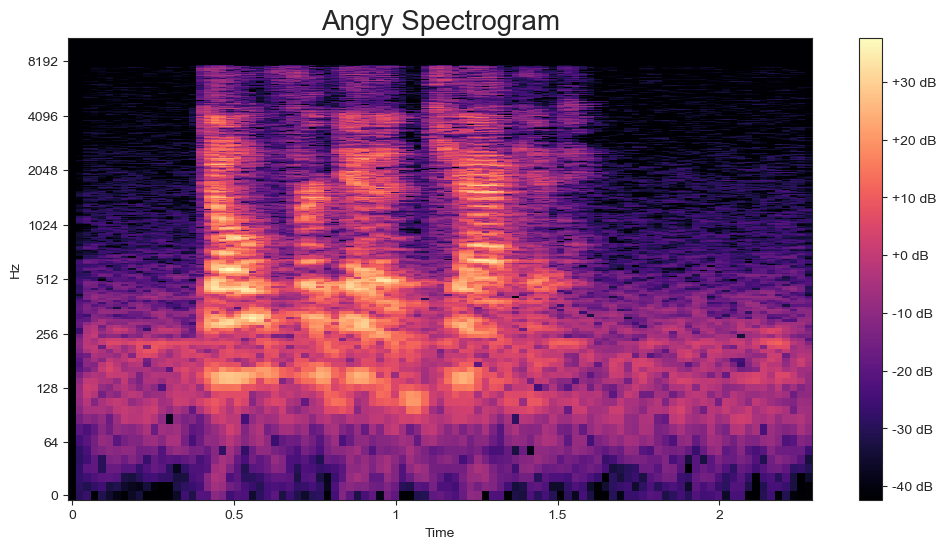

In [88]:
#angry emotion
waveplot(audio_df[audio_df['Emotion']=='angry'][['File_path','Emotion']].iloc[0])
spectrogram(audio_df[audio_df['Emotion']=='angry'][['File_path','Emotion']].iloc[0])

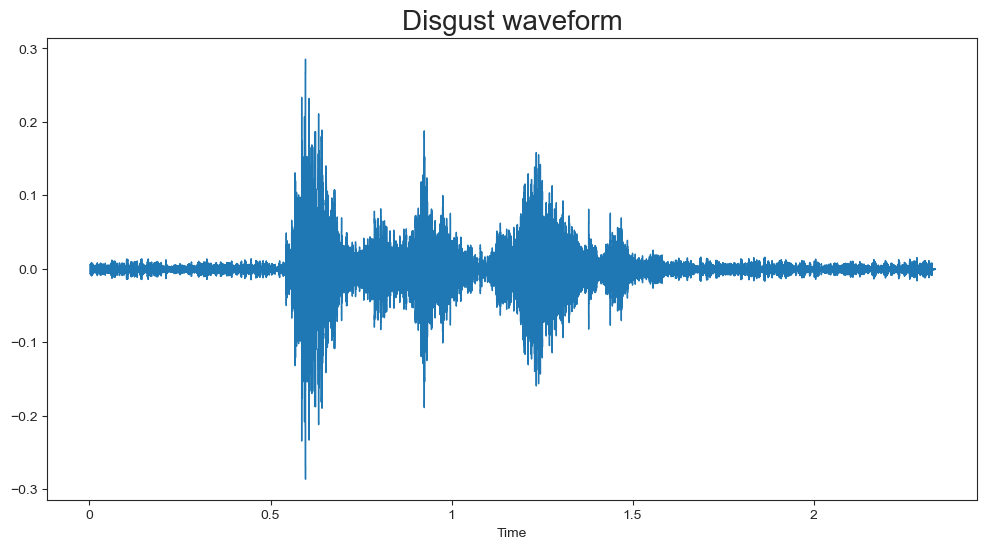

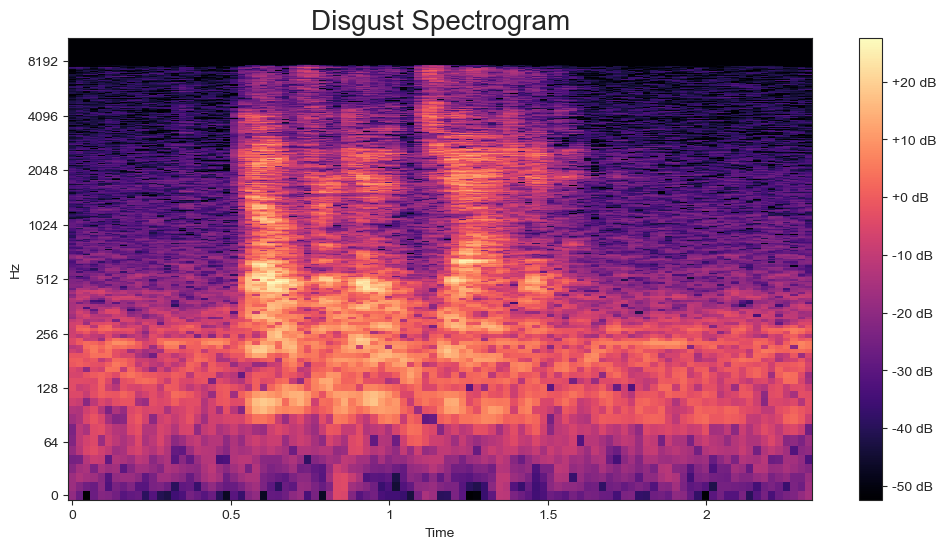

In [89]:
#disgust emotion
waveplot(audio_df[audio_df['Emotion']=='disgust'][['File_path','Emotion']].iloc[0])
spectrogram(audio_df[audio_df['Emotion']=='disgust'][['File_path','Emotion']].iloc[0])

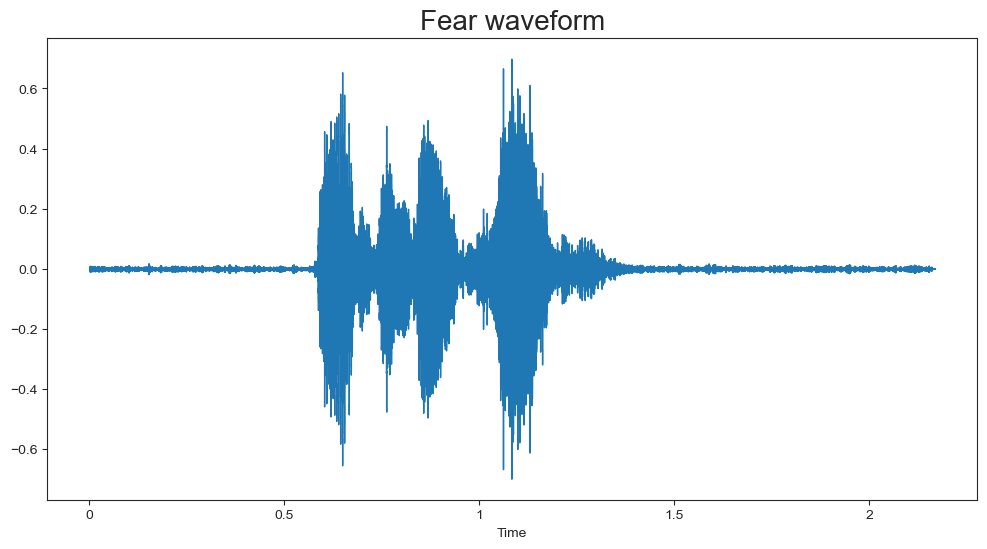

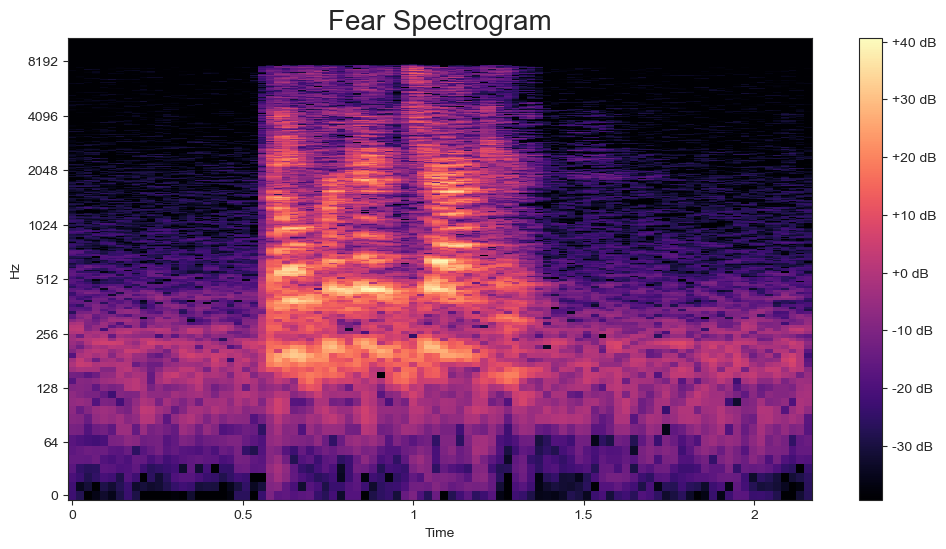

In [91]:
#fear emotion
waveplot(audio_df[audio_df['Emotion']=='fear'][['File_path','Emotion']].iloc[0])
spectrogram(audio_df[audio_df['Emotion']=='fear'][['File_path','Emotion']].iloc[0])

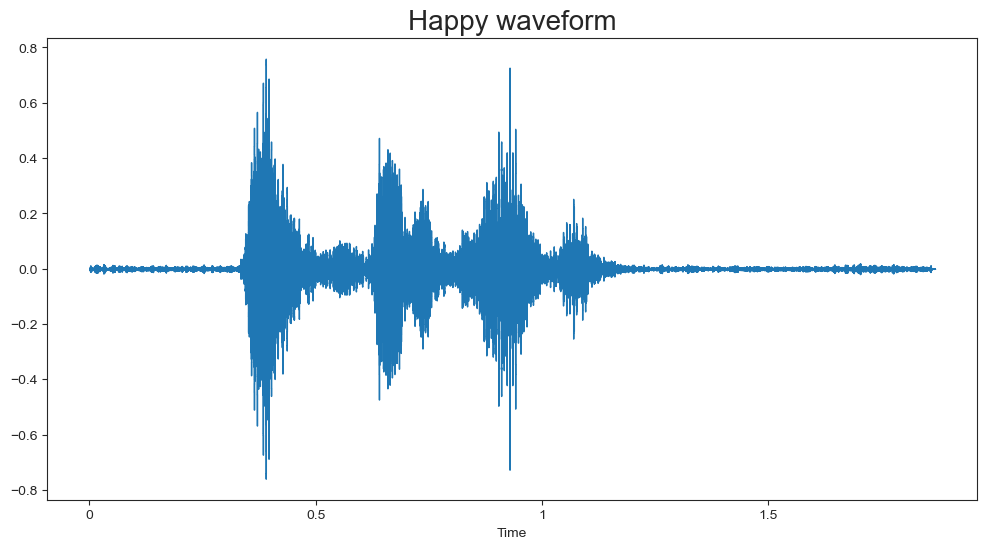

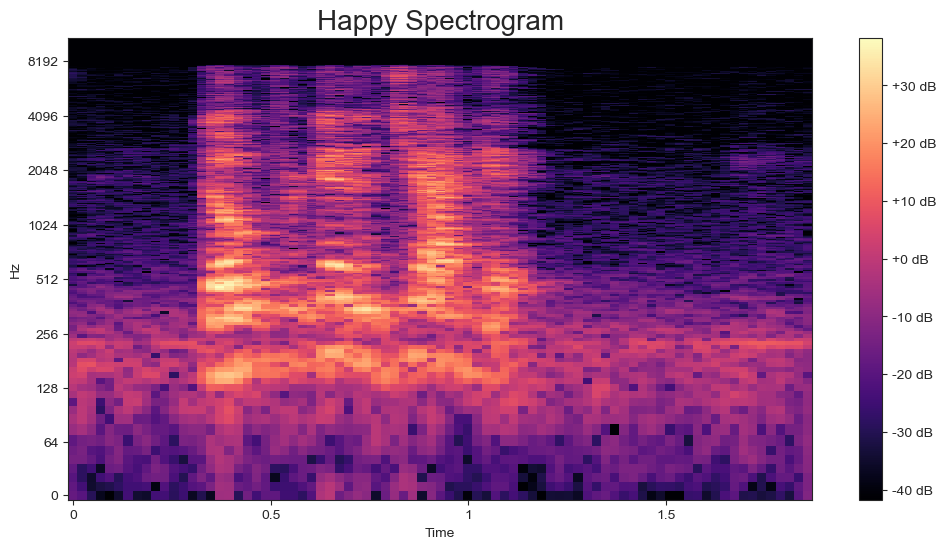

In [92]:
#happy emotion
waveplot(audio_df[audio_df['Emotion']=='happy'][['File_path','Emotion']].iloc[0])
spectrogram(audio_df[audio_df['Emotion']=='happy'][['File_path','Emotion']].iloc[0])

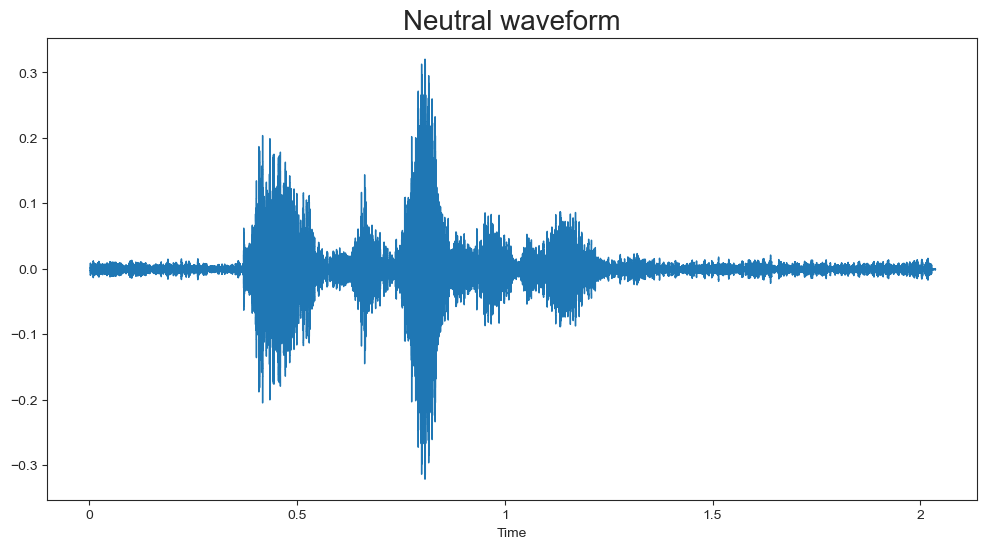

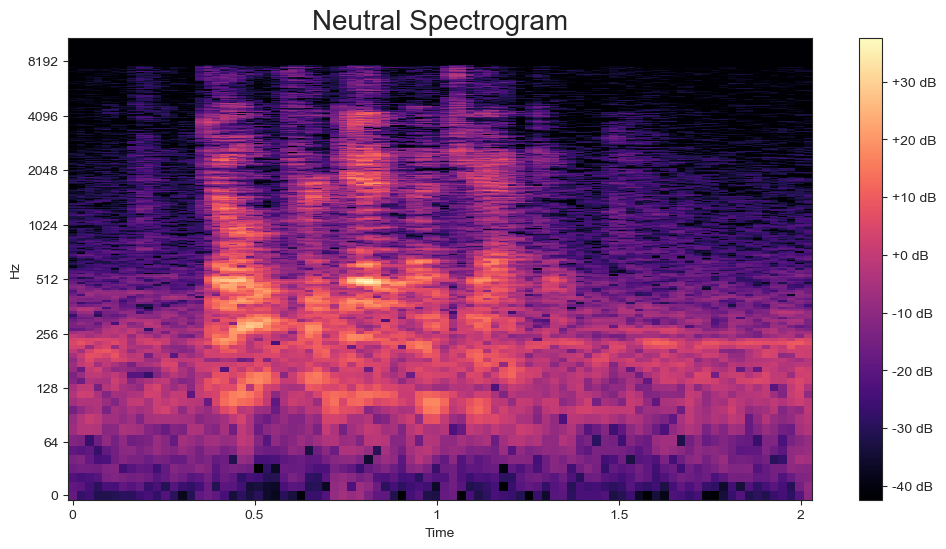

In [93]:
#neutral emotion
waveplot(audio_df[audio_df['Emotion']=='neutral'][['File_path','Emotion']].iloc[0])
spectrogram(audio_df[audio_df['Emotion']=='neutral'][['File_path','Emotion']].iloc[0])

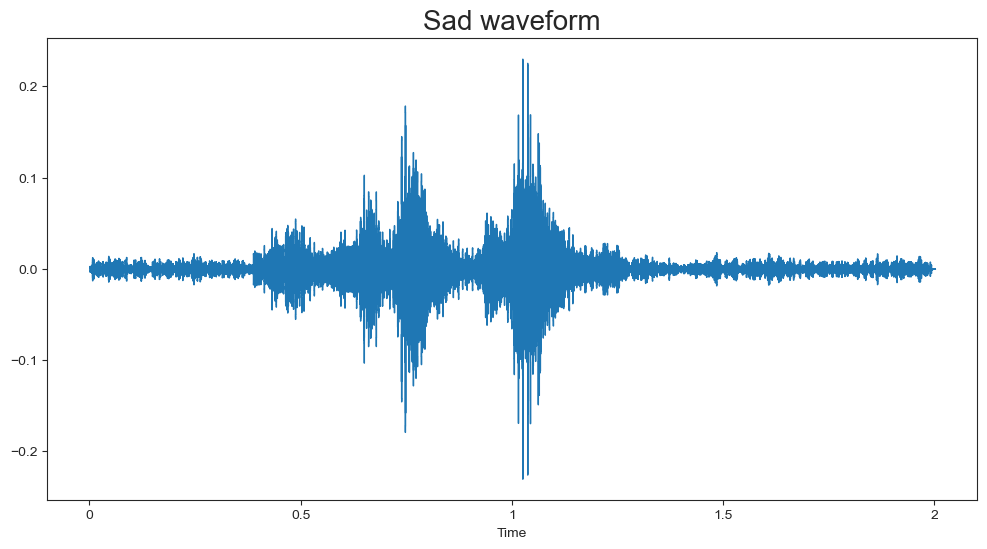

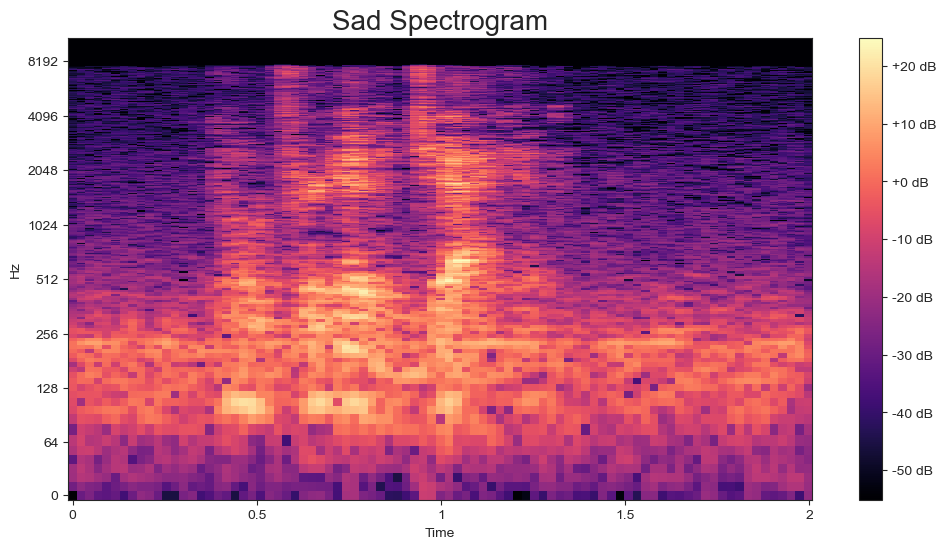

In [94]:
#sad emotion
waveplot(audio_df[audio_df['Emotion']=='sad'][['File_path','Emotion']].iloc[0])
spectrogram(audio_df[audio_df['Emotion']=='sad'][['File_path','Emotion']].iloc[0])

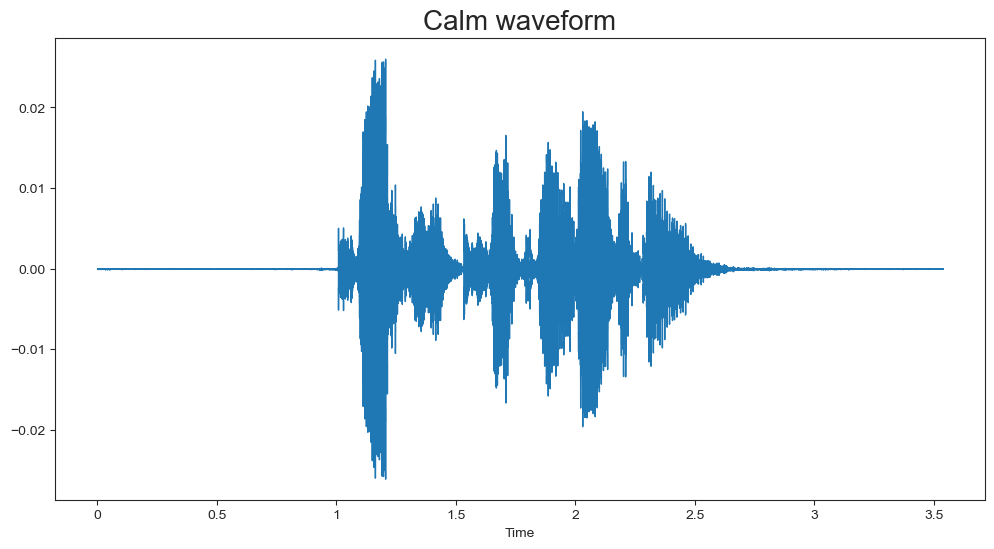

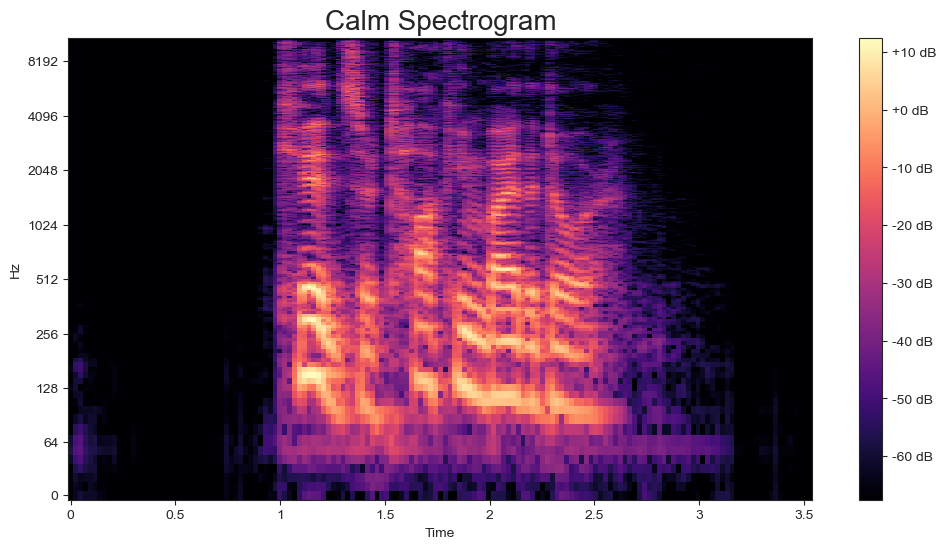

In [95]:
#calm emotion
waveplot(audio_df[audio_df['Emotion']=='calm'][['File_path','Emotion']].iloc[0])
spectrogram(audio_df[audio_df['Emotion']=='calm'][['File_path','Emotion']].iloc[0])

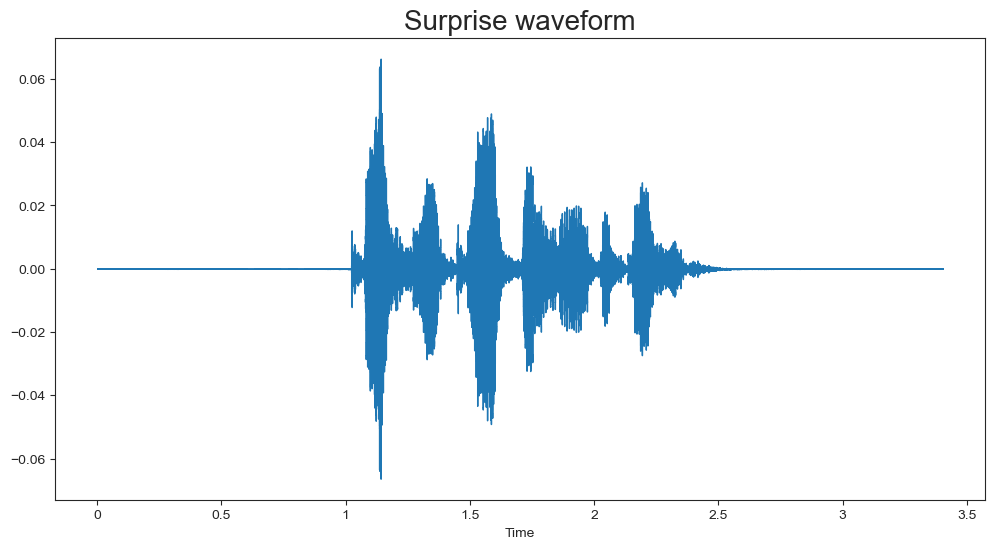

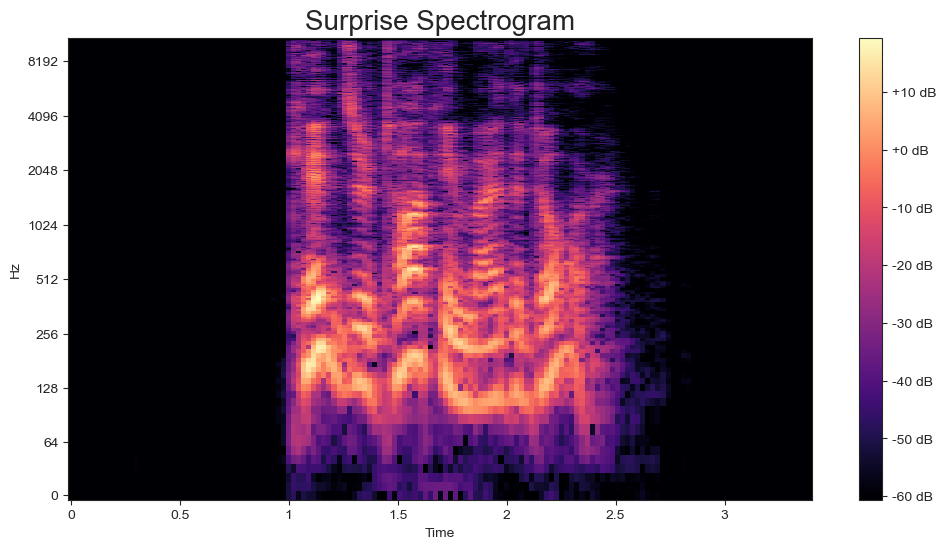

In [96]:
#suprise emotion
waveplot(audio_df[audio_df['Emotion']=='surprise'][['File_path','Emotion']].iloc[0])
spectrogram(audio_df[audio_df['Emotion']=='surprise'][['File_path','Emotion']].iloc[0])

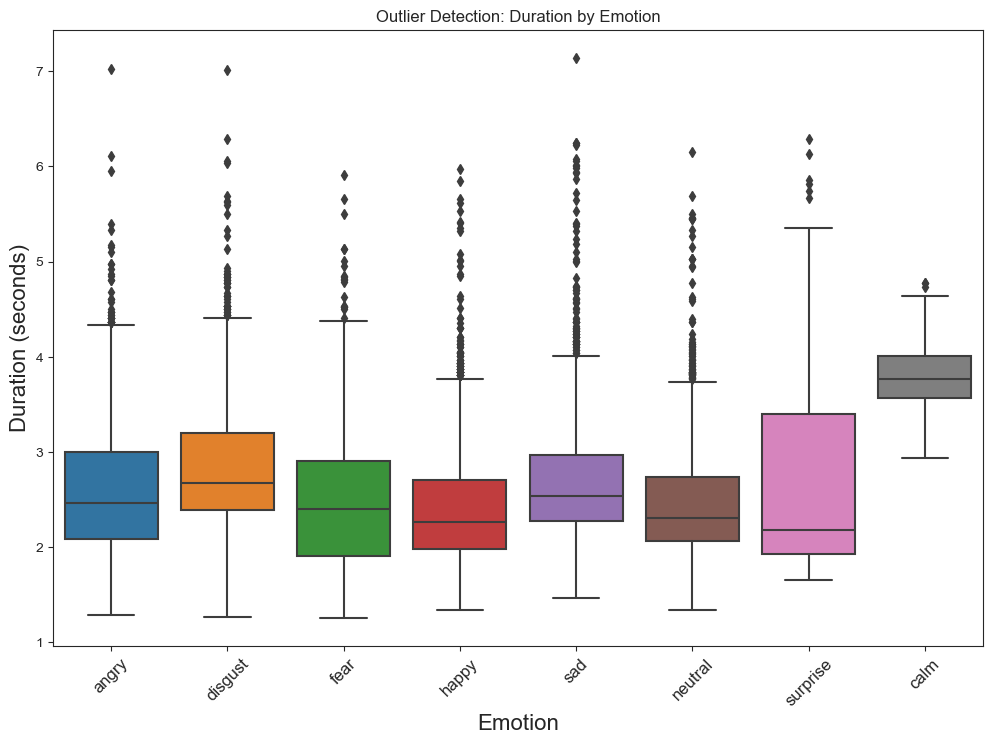

In [119]:
#Outlier detection
plt.figure(figsize=(12,8))
plt.title('Outlier Detection: Duration by Emotion',size=20)
sns.boxplot(x='Emotion',y='Duration',data=audio_df,order=audio_df['Emotion'].value_counts().index)
plt.xlabel('Emotion',size=16)
plt.ylabel('Duration (seconds)',size=16)
plt.xticks(rotation=45,size=12);